In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [5]:
#[].to_csv
# _변수이름 = pd.read_csv("__경로_파일명",__)
# train : 학습할 용도 , test : 실제(답이 없는 문제), sub : omr답안지
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
                   
train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

* train.head() 데이터를 확인
* train에는 Survived가 있고, test에는 없다.

In [6]:
print(train.columns)
print(test.columns)
print(sub.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived'], dtype='object')


In [7]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

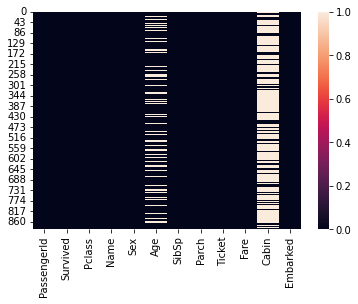

In [12]:
sns.heatmap(train.isnull())

In [13]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot:xlabel='Survived', ylabel='count'>

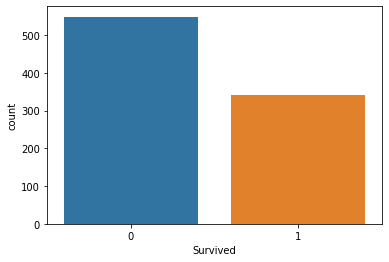

In [14]:
sns.countplot(x='Survived',data=train)

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

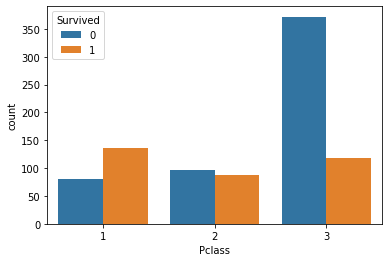

In [16]:
sns.countplot(x="Pclass", hue="Survived", data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

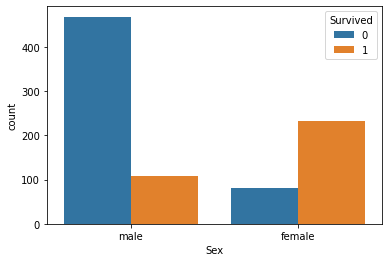

In [17]:
sns.countplot(x="Sex", hue="Survived", data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

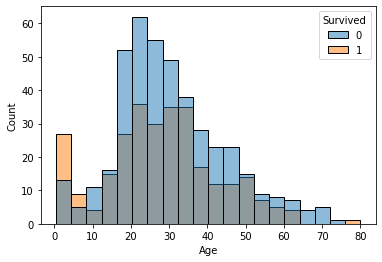

In [18]:
sns.histplot(x= 'Age',hue = 'Survived', data=train)

In [19]:
train_p1 = train[train['Pclass']==1]   # 데이터에서 Pclass:1만 가져오기
train_p2 = train[train['Pclass']==2]   # 데이터에서 Pclass:2만 가져오기
train_p3 = train[train['Pclass']==3]   # 데이터에서 Pclass:3만 가져오기

<AxesSubplot:xlabel='Age', ylabel='Count'>

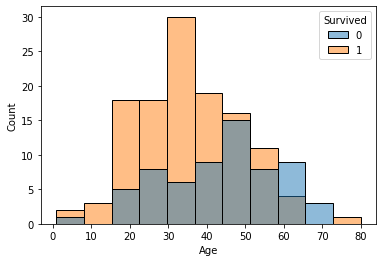

In [20]:
sns.histplot(x= 'Age',hue = 'Survived', data=train_p1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

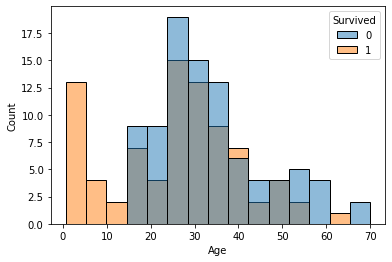

In [21]:
sns.histplot(x= 'Age',hue = 'Survived', data=train_p2)

<AxesSubplot:xlabel='Age', ylabel='Count'>

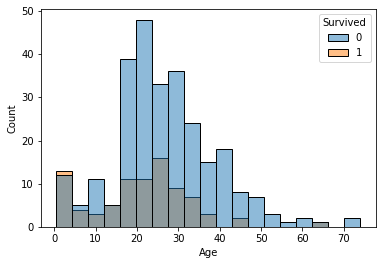

In [22]:
sns.histplot(x= 'Age',hue = 'Survived', data=train_p3)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

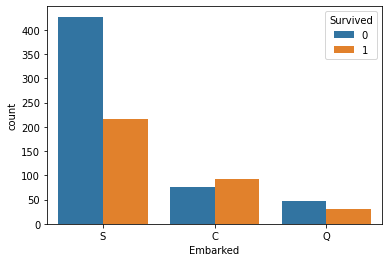

In [31]:
sns.countplot(x='Embarked', hue="Survived", data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

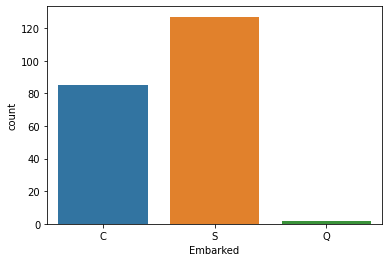

In [42]:
sns.countplot(x= 'Embarked', data=train_p1)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

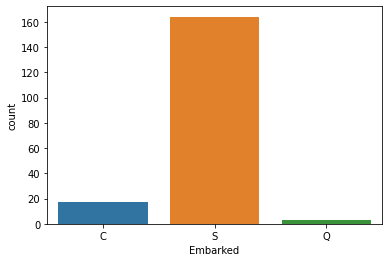

In [43]:
sns.countplot(x= 'Embarked', data=train_p2)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

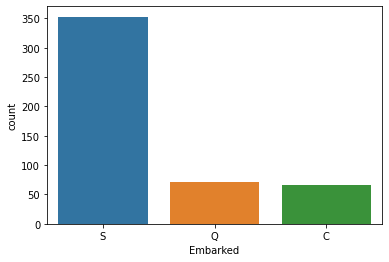

In [46]:
sns.countplot(x= 'Embarked',data=train_p3)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

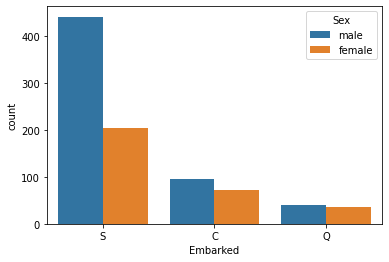

In [36]:
sns.countplot(x='Embarked', hue="Sex", data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

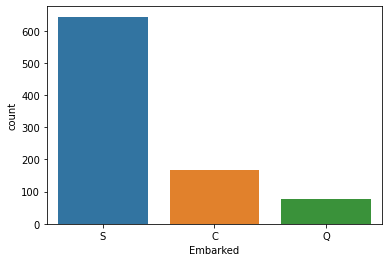

In [40]:
sns.countplot(x='Embarked',  data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

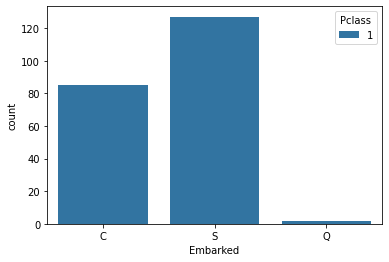

In [47]:
sns.countplot(x='Embarked', hue='Pclass', data = train_p1)

In [49]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Pclass', ylabel='count'>

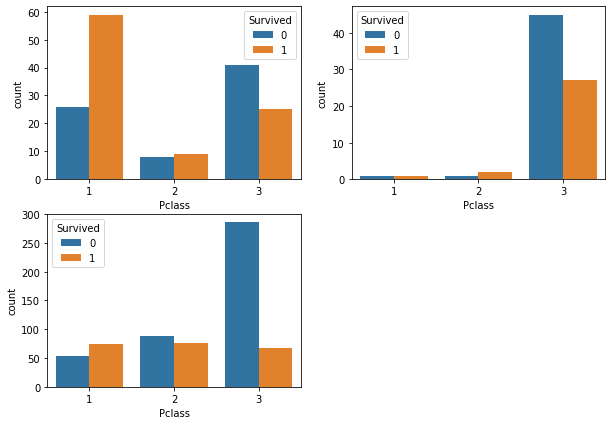

In [50]:
train_C = train[train['Embarked']=='C']
train_Q = train[train['Embarked']=='Q']
train_S = train[train['Embarked']=='S']

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='Pclass', hue='Survived', data=train_C)

plt.subplot(2,2,2)
sns.countplot(x='Pclass', hue='Survived', data=train_Q)


plt.subplot(2,2,3)
sns.countplot(x='Pclass', hue='Survived', data=train_S)